In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import FFNet
from cosmosis.learning import Learn, Selector
from cosmosis.dataset import SKDS

from dataset import QM7, QM7b, QM7X, QM9, ANI1x

from torch.optim import Adam
from torch.nn import MSELoss, L1Loss
from torch.optim.lr_scheduler import ReduceLROnPlateau

CDataset created...
SKDS make_regression created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.202410
epoch: 0, lr: 0.01
train loss: 32145.639973958332, val loss: 23348.21171875
sklearn train metric: 0, sklearn validation metric: 0
test loss: 805.0607299804688
learning time: 0:00:08.041020
sklearn test metric: 
0 



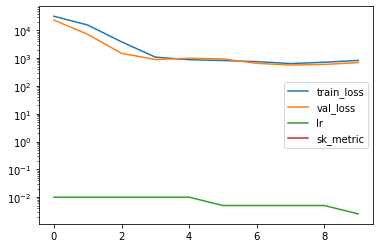

In [2]:
model_params = {'D_in': 128, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['X'],
                              'targets': ['y'],
                              'features_dtype': 'float32',
                              'targets_dtype': 'float32',
                              'make': 'make_regression',
                              'transform': [],
                              'target_transform': [],
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 128}}}

metrics_params = {'report_interval': 10}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7, .15)}

sched_params = {'factor': .5,
                'patience': 1}

l = Learn([SKDS], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=MSELoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=10)

In [ ]:
model_params = {'D_in': 23*23+23*23+23*32, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atoms',7,32,0,True)]}

ds_params = {'train_params': {'features': ['distance','coulomb'],
                              'targets': ['ae'],
                              'embeds': ['atoms'],
                              'in_file': './data/qm7/qm7.mat'}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 10,
                'cooldown': 5}

opt_params = {'lr': 0.01}

l = Learn([QM7], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=512, epochs=10)

CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:00.661893
epoch: 0, lr: 0.01
train loss: 1566.9557698567708, val loss: 1558.3224487304688
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:06.457116
epoch: 10, lr: 0.01
train loss: 741.5277506510416, val loss: 630.444580078125
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:12.272455
epoch: 20, lr: 0.01
train loss: 52.69741651746962, val loss: 60.62381935119629
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:17.993798
epoch: 30, lr: 0.01
train loss: 44.14132520887587, val loss: 54.02102851867676
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:23.801389
epoch: 40, lr: 0.01
train loss: 41.51680162217882, val loss: 53.356204986572266
sklearn train metric: 0, sklearn validation metric: 0
test loss: 54.15824890136719
learning time: 0:00:29.235537
sklearn test metric: 
0 



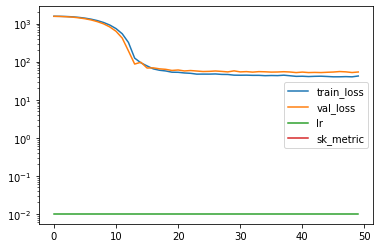

In [5]:
model_params = {'D_in': 23*23, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['coulomb'],
                              'targets': ['E'],
                              'in_file': './data/qm7b/qm7b.mat'}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 10,
                'cooldown': 5}

opt_params = {'lr': 0.01}

l = Learn([QM7b], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=512, epochs=50)

In [ ]:
#find the longest molecule

ds_params = {'ds_params': {'features': ['atNUM'],
                           'pad': False,
                           'targets': ['eAT'],
                           'embed': [],
                           'selector': ['opt'],
                           'use_h5': True}}

qm7x = QM7X(**ds_params['ds_params'])
l = 0
for i in qm7x.ds_idx:
    s = qm7x[i][0].shape.numel()
    if s > l:
        l = s
print('longest molecule length: ', l)

qm7x[1]

In [ ]:
model_params = {'D_in': 23*23+23*64, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['distance'],
                              'pad': 23,
                              'targets': ['eAT'],
                              'embed': [('atNUM',9,64,0,True)],
                              'selector': ['opt'],
                              'use_h5': False}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 10,
                'cooldown': 5}

opt_params = {'lr': 0.01}

l = Learn([QM7X], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=10)

In [ ]:
model_params = {'D_in': 12*12+12*12+12*12*16, 
                'H': 4096, 
                'D_out': 12, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'n': 133885, 
                              'features': ['distance','coulomb'],
                              'embed': [('adjacency',4,16,0,True)], 
                              'targets': ['mulliken'],
                              'pad': 12, 
                              'filter_on': ('n_atoms','<','13'),
                              'use_pickle': 'n_atoms_less_than_13.p'}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}

opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=128, epochs=10)

In [ ]:
model_params = {'D_in': 29*29+29*29+29*29*8, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'n': 133885, 
                              'features': ['distance','coulomb'],
                              'embed': [('adjacency',4,8,0,True)],
                              'targets': ['U0'],
                              'pad': 29, 
                              'filter_on': False,
                              'use_pickle': 'qm9.p'}}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}
opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=32, epochs=20)

In [ ]:
model_params = {'D_in': 64*63+63*63, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['distance'],
                              'targets': ['wb97x_dz.energy'],
                              'embed': [('atomic_numbers',6,64,0,True)],
                              'pad': 63, #length of the longest molecule in the dataset
                              'criterion': 'wb97x_dz.energy',
                              'conformation': 'min',
                              'in_file': './data/ani1x/ani1x-release.h5'}}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 10,
                'cooldown': 10}
opt_params = {'lr': 0.01}

l = Learn([ANI1x], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=128, epochs=100)